In [ ]:
import pandas as pd 
import numpy as np

sony_df = pd.read_csv("/content/dump_twitter.csv")

sony_df.head()

,User_ID,Tweet,Timestamp
0,1268425721199940000,RT @SonyMAX: Hindi filmon ke \\xe2\\x80\\x98Ti...,12/27/2020 13:41
1,1324329224115690000,JUST IN: sony to file a lawsuit against a twit...,12/27/2020 13:41
2,781134624286134000,RT @SonyMAX: Hindi filmon ke \\xe2\\x80\\x98Ti...,12/27/2020 13:41
3,742175332871049000,RT @SonyMAX: Hindi filmon ke \\xe2\\x80\\x98Ti...,12/27/2020 13:41
4,1250670699582110000,@pisslorde Sony got small call it tiny now',12/27/2020 13:40


In [ ]:
sony_df = sony_df.drop(columns=['User_ID', 'Timestamp'])
sony_df

,Tweet
0,RT @SonyMAX: Hindi filmon ke \\xe2\\x80\\x98Ti...
1,JUST IN: sony to file a lawsuit against a twit...
2,RT @SonyMAX: Hindi filmon ke \\xe2\\x80\\x98Ti...
3,RT @SonyMAX: Hindi filmon ke \\xe2\\x80\\x98Ti...
4,@pisslorde Sony got small call it tiny now'
...,...
10153,Oh boy it\\xe2\\x80\\x99s getting real. #Spide...
10154,Come join our PS5 group chat! \\n\\xf0\\x9f\\x...
10155,RT @SriniMaama16: #PaavaKadhaigal streaming bo...
10156,RT @UberFacts: Sony is removing Cyberpunk 2077...


In [ ]:
# ------ Case Folding --------
# gunakan fungsi Series.str.lower() pada Pandas
sony_df['Tweet'] = sony_df['Tweet'].str.lower()


print('Case Folding Result : \n')
print(sony_df['Tweet'].head(5))
print('\n\n\n')

Case Folding Result : 

0    rt @sonymax: hindi filmon ke \\xe2\\x80\\x98ti...
1    just in: sony to file a lawsuit against a twit...
2    rt @sonymax: hindi filmon ke \\xe2\\x80\\x98ti...
3    rt @sonymax: hindi filmon ke \\xe2\\x80\\x98ti...
4          @pisslorde sony got small call it tiny now'
Name: Tweet, dtype: object






In [ ]:
import re
#remove tweet special
def remove_tweet_special(text):
    # remove tab, new line, ans back slice
    text = text.replace('\\t'," ").replace('\\n'," ").replace('\\u'," ").replace('\\',"")
    # remove non ASCII (emoticon, chinese word, .etc)
    text = text.encode('ascii', 'replace').decode('ascii')
    # remove mention, link, hashtag
    text = ' '.join(re.sub("([@#][A-Za-z0-9]+)|(\w+:\/\/\S+)"," ", text).split())
    # remove incomplete URL
    return text.replace("http://", " ").replace("https://", " ")
                
sony_df['Tweet'] = sony_df['Tweet'].apply(remove_tweet_special)
print(sony_df['Tweet'].head(5))
print('\n\n\n')

0    rt : hindi filmon ke xe2x80x98tigerxe2x80x99 k...
1    just in: sony to file a lawsuit against a twit...
2    rt : hindi filmon ke xe2x80x98tigerxe2x80x99 k...
3    rt : hindi filmon ke xe2x80x98tigerxe2x80x99 k...
4                     sony got small call it tiny now'
Name: Tweet, dtype: object






In [ ]:
#remove number
def remove_number(text):
    return  re.sub(r"\d+", "", text)

sony_df['Tweet'] = sony_df['Tweet'].apply(remove_number)
print(sony_df['Tweet'].head(5))
print('\n\n\n')

0    rt : hindi filmon ke xexxtigerxexx ko sony max...
1    just in: sony to file a lawsuit against a twit...
2    rt : hindi filmon ke xexxtigerxexx ko sony max...
3    rt : hindi filmon ke xexxtigerxexx ko sony max...
4                     sony got small call it tiny now'
Name: Tweet, dtype: object






In [ ]:
def remove_whitespace_LT(text):
    return text.strip()

sony_df['Tweet'] = sony_df['Tweet'].apply(remove_whitespace_LT)
print(sony_df['Tweet'].head(5))
print('\n\n\n')

0    rt : hindi filmon ke xexxtigerxexx ko sony max...
1    just in: sony to file a lawsuit against a twit...
2    rt : hindi filmon ke xexxtigerxexx ko sony max...
3    rt : hindi filmon ke xexxtigerxexx ko sony max...
4                     sony got small call it tiny now'
Name: Tweet, dtype: object






In [ ]:
def remove_whitespace_multiple(text):
    return re.sub('\s+',' ',text)

sony_df['Tweet'] = sony_df['Tweet'].apply(remove_whitespace_multiple)
print(sony_df['Tweet'].head(5))
print('\n\n\n')

0    rt : hindi filmon ke xexxtigerxexx ko sony max...
1    just in: sony to file a lawsuit against a twit...
2    rt : hindi filmon ke xexxtigerxexx ko sony max...
3    rt : hindi filmon ke xexxtigerxexx ko sony max...
4                     sony got small call it tiny now'
Name: Tweet, dtype: object






In [ ]:
def remove_singl_char(text):
    return re.sub(r"\b[a-zA-Z]\b", "", text)

sony_df['Tweet'] = sony_df['Tweet'].apply(remove_singl_char)
print(sony_df['Tweet'].head(5))
print('\n\n\n')

0    rt : hindi filmon ke xexxtigerxexx ko sony max...
1    just in: sony to file  lawsuit against  twitte...
2    rt : hindi filmon ke xexxtigerxexx ko sony max...
3    rt : hindi filmon ke xexxtigerxexx ko sony max...
4                     sony got small call it tiny now'
Name: Tweet, dtype: object






In [ ]:
import string

def remove_punctuation(text):
    return text.translate(str.maketrans("","",string.punctuation))

sony_df['Tweet'] = sony_df['Tweet'].apply(remove_punctuation)
print(sony_df['Tweet'].head(5))
print('\n\n\n')

0    rt  hindi filmon ke xexxtigerxexx ko sony max ...
1    just in sony to file  lawsuit against  twitter...
2    rt  hindi filmon ke xexxtigerxexx ko sony max ...
3    rt  hindi filmon ke xexxtigerxexx ko sony max ...
4                      sony got small call it tiny now
Name: Tweet, dtype: object






In [ ]:
!pip install pycountry

In [ ]:
!pip install langdetect

In [ ]:
from textblob import TextBlob
import sys
import tweepy
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import nltk
import pycountry
import re
import string
from wordcloud import WordCloud, STOPWORDS
from PIL import Image
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from langdetect import detect
from nltk.stem import SnowballStemmer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import CountVectorizer

/usr/local/lib/python3.6/dist-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [ ]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [ ]:
sony_df[['polarity', 'subjectivity']] = sony_df['Tweet'].apply(lambda Text: pd.Series(TextBlob(Text).sentiment))
for index, row in sony_df['Tweet'].iteritems():
  score = SentimentIntensityAnalyzer().polarity_scores(row)
  neg = score['neg']
  neu = score['neu']
  pos = score['pos']
  comp = score['compound']
  if neg > pos:
    sony_df.loc[index, 'sentiment'] = "negative"
  elif pos > neg:
    sony_df.loc[index, 'sentiment'] = "positive"
  else:
    sony_df.loc[index, 'sentiment'] = "neutral"
    sony_df.loc[index, 'neg'] = neg
    sony_df.loc[index, 'neu'] = neu
    sony_df.loc[index, 'pos'] = pos
    sony_df.loc[index, 'compound'] = comp

sony_df.head(10)

,Tweet,polarity,subjectivity,sentiment,neg,neu,pos,compound
0,rt hindi filmon ke xexxtigerxexx ko sony max ...,1.000000,1.000000,positive,NaN,NaN,NaN,NaN
1,just in sony to file lawsuit against twitter...,0.345455,0.583333,negative,NaN,NaN,NaN,NaN
2,rt hindi filmon ke xexxtigerxexx ko sony max ...,1.000000,1.000000,positive,NaN,NaN,NaN,NaN
3,rt hindi filmon ke xexxtigerxexx ko sony max ...,1.000000,1.000000,positive,NaN,NaN,NaN,NaN
4,sony got small call it tiny now,-0.125000,0.450000,neutral,0.0,1.0,0.0,0.0
5,rt hindi filmon ke xexxtigerxexx ko sony max ...,1.000000,1.000000,positive,NaN,NaN,NaN,NaN
6,soc think itxexxs out of the control of eithe...,0.200000,0.200000,neutral,0.0,1.0,0.0,0.0
7,rt sony confirms it making movies and tv show...,0.000000,0.000000,positive,NaN,NaN,NaN,NaN
8,ooohh well sorry to hear that weve used sony...,0.166667,0.666667,positive,NaN,NaN,NaN,NaN
9,brazilian court reportedly orders sony to unbl...,0.000000,0.000000,negative,NaN,NaN,NaN,NaN


In [ ]:
sony_df_negative = sony_df[sony_df["sentiment"]=="negative"]
sony_df_positive = sony_df[sony_df["sentiment"]=="positive"]
sony_df_neutral = sony_df[sony_df["sentiment"]=="neutral"]

In [ ]:
def count_values_in_column(data,feature):
  total=data.loc[:,feature].value_counts(dropna=False)
  percentage=round(data.loc[:,feature].value_counts(dropna=False,normalize=True)*100,2)
  return pd.concat([total,percentage],axis=1,keys=['Total','Percentage'])
#Count_values for sentiment
count_values_in_column(sony_df,"sentiment")

,Total,Percentage
positive,4771,46.97
neutral,3127,30.78
negative,2260,22.25


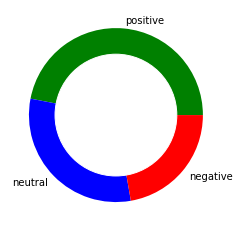

In [ ]:
# create data for Pie Chart
pc = count_values_in_column(sony_df,"sentiment")
names= pc.index
size=pc["Percentage"]
 
# Create a circle for the center of the plot
my_circle=plt.Circle( (0,0), 0.7, color='white')
plt.pie(size, labels=names, colors=['green','blue','red'])
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()